In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error,silhouette_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
#STEP-1:DATA COLLECTION
df=pd.read_csv("C:\\Users\\trigo\\Downloads\\predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
#STEP-2:DATA ANALYSIS
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [5]:
df.sample(5) #TO PRINT RANDOM ROWS

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
847,848,L48027,L,296.4,307.4,2833,5.6,213,1,Power Failure
3371,3372,L50551,L,301.4,310.7,1989,21.8,19,0,No Failure
8330,8331,L55510,L,298.8,309.7,1505,39.0,131,0,No Failure
4590,4591,L51770,L,302.8,311.1,1456,36.1,89,0,No Failure
8021,8022,M22881,M,301.0,312.0,1499,34.6,207,0,No Failure


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
#UID: unique identifier ranging from 1 to 10000

#productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants
#and a variant-specific serial number

#Type: type of models large, medium or small.
#air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

#process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature
#plus 10 K.

#rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise

#torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.

#tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.


#Target : Failure or Not
#Failure Type : Type of Failure

In [8]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [9]:
df.shape

(10000, 10)

In [10]:
df.size

100000

In [11]:
df.iloc[:,3:6] 

,Air temperature [K],Process temperature [K],Rotational speed [rpm]
0,298.1,308.6,1551
1,298.2,308.7,1408
2,298.1,308.5,1498
3,298.2,308.6,1433
4,298.2,308.7,1408
...,...,...,...
9995,298.8,308.4,1604
9996,298.9,308.4,1632
9997,299.0,308.6,1645
9998,299.0,308.7,1408


In [12]:
df.loc[3,'Air temperature [K]']

298.2

In [13]:
df["Product ID"].value_counts().reset_index()

,Product ID,count
0,M14860,1
1,L53850,1
2,L53843,1
3,L53844,1
4,L53845,1
...,...,...
9995,M18193,1
9996,M18194,1
9997,L50515,1
9998,L50516,1


In [14]:
df["Air temperature [K]"].value_counts().reset_index()

,Air temperature [K],count
0,300.7,279
1,298.9,231
2,297.4,230
3,300.5,229
4,298.8,227
...,...,...
88,304.4,7
89,296.0,6
90,295.4,3
91,295.3,3


In [15]:
df["Air temperature [K]"].skew()

0.11427392052155042

In [16]:
df["Target"].unique()

array([0, 1], dtype=int64)

In [17]:
df["Failure Type"].loc[50]

'Power Failure'

In [18]:
df["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [19]:
for i in range(len(df["Failure Type"])):
    if(df["Failure Type"][i]=="Power Failure"):
        print(i)

50
69
168
194
207
259
380
442
463
603
847
880
903
1016
1095
1123
1124
1144
1284
1324
1391
1492
1496
1784
1789
1808
2015
2125
2233
2299
2426
2444
2598
2879
3000
3140
3369
3457
3579
3854
3867
3928
3943
4002
4048
4071
4254
4292
4296
4342
4353
4417
4419
4762
4920
4936
4988
4997
5048
5334
5394
5490
5615
5617
5706
5909
6024
6178
6248
6525
6540
6618
6678
6799
6932
6990
7011
7083
7280
7536
7564
7569
7763
7884
7997
8245
8307
8398
8582
8926
9084
9175
9613
9764
9974


In [20]:
for i in range(len(df["Failure Type"])):
    if(df["Failure Type"][i]=="Tool Wear Failure"):
        print(i)

77
1087
1509
1682
1763
1996
2166
2244
2671
2864
2941
3529
3611
3695
3865
4034
4207
4385
4469
4646
4816
5141
5309
5401
5999
6172
6256
6340
6419
6759
7087
7426
7510
7687
7849
8111
8199
8357
8609
8690
8846
9018
9174
9576
9758


In [21]:
for i in range(len(df["Failure Type"])):
    if(df["Failure Type"][i]=="Overstrain Failure"):
        print(i)

160
161
242
248
249
327
586
746
926
1085
1161
1162
1167
1334
1335
1419
1583
1595
1833
2075
2331
2332
2494
2502
2581
2761
2858
3019
3266
3350
3356
3528
3684
3935
4024
4032
4117
4814
4976
4984
5061
5219
5399
5400
5488
5734
6078
6153
6159
6255
6497
6673
6924
7167
7509
7591
7593
7669
7756
7759
7926
8026
8192
8195
8437
8608
9014
9016
9414
9493
9653
9654
9659
9663
9664
9667
9822
9830


In [22]:
for i in range(len(df["Failure Type"])):
    if(df["Failure Type"][i]=="Random Failures"):
        print(i)

1221
1302
1748
2072
2559
3065
3452
5471
5489
5495
5509
5553
5639
6091
6913
6960
7488
7868


In [23]:
df["Failure Type"].loc[7087]

'Tool Wear Failure'

In [24]:
for i in range(len(df["Failure Type"])):
    if(df["Failure Type"][i]=="Heat Dissipation Failure"):
        print(i)

3236
3760
3787
3793
3806
3814
3829
4078
4080
4081
4087
4096
4119
4120
4121
4130
4138
4140
4151
4153
4155
4157
4164
4170
4173
4179
4182
4184
4185
4211
4225
4247
4249
4251
4253
4258
4270
4279
4282
4283
4285
4307
4323
4326
4328
4355
4361
4370
4383
4389
4391
4400
4405
4406
4409
4421
4427
4435
4441
4448
4449
4462
4475
4480
4495
4501
4510
4527
4533
4536
4544
4556
4558
4565
4570
4579
4596
4600
4601
4611
4618
4620
4621
4632
4642
4643
4651
4661
4665
4669
4702
4718
4720
4723
4727
4729
4731
4737
4739
4748
4755
4759
4761
4768
4770
4778
4831
4833
4836
4840
4844
4851


In [25]:
for i in range(len(df["Failure Type"])):
    if(df["Failure Type"][i]=="Heat Dissipation Failure"):
        print(i)

3236
3760
3787
3793
3806
3814
3829
4078
4080
4081
4087
4096
4119
4120
4121
4130
4138
4140
4151
4153
4155
4157
4164
4170
4173
4179
4182
4184
4185
4211
4225
4247
4249
4251
4253
4258
4270
4279
4282
4283
4285
4307
4323
4326
4328
4355
4361
4370
4383
4389
4391
4400
4405
4406
4409
4421
4427
4435
4441
4448
4449
4462
4475
4480
4495
4501
4510
4527
4533
4536
4544
4556
4558
4565
4570
4579
4596
4600
4601
4611
4618
4620
4621
4632
4642
4643
4651
4661
4665
4669
4702
4718
4720
4723
4727
4729
4731
4737
4739
4748
4755
4759
4761
4768
4770
4778
4831
4833
4836
4840
4844
4851


In [26]:
le=LabelEncoder()
df["Type"]=le.fit_transform(df["Type"])
df["Failure Type"]=le.fit_transform(df["Failure Type"])

In [27]:
df  

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,298.8,308.4,1604,29.5,14,0,1
9996,9997,H39410,0,298.9,308.4,1632,31.8,17,0,1
9997,9998,M24857,2,299.0,308.6,1645,33.4,22,0,1
9998,9999,H39412,0,299.0,308.7,1408,48.5,25,0,1


In [28]:
#TYPE 2 - DENOTES MEDIUM 
#TYPE 1-  DENOTES LARGE
#TYPE 0-  DENOTES HIGH

In [29]:
df["Failure Type"].unique()

array([1, 3, 5, 2, 4, 0])

In [30]:
#FAILURE TYPE 1- DENOTES NO FAILURE
#FAILURE TYPE 2- DENOTES OVERSTRAIN FAILURE
#FAILURE TYPE 3-DENOTES POWER FAILURE
#FAILURE TYPE 5-DENOTES TOOL WEAR FAILURE
#FAILURE TYPE 4 DENOTES RANDOM FAILURE
#FAILURE TYPE 0 DENOTES HEAT DISSIPATION FAILURE

In [31]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,298.8,308.4,1604,29.5,14,0,1
9996,9997,H39410,0,298.9,308.4,1632,31.8,17,0,1
9997,9998,M24857,2,299.0,308.6,1645,33.4,22,0,1
9998,9999,H39412,0,299.0,308.7,1408,48.5,25,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  int32  
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  int32  
dtypes: float64(3), int32(2), int64(4), object(1)
memory usage: 703.2+ KB


In [33]:
#TO CHANGE A COLUMN TO DATE TIME
#df[col name]=pd.to_datetime(df[colname])


In [34]:
#STEP-3: EXPLORATORY DATA ANALYSIS
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [35]:
#HENCE NO NULL VALUES ARE PRESENT IN THE DATAFRAME
#TO FILL NULL VALUES FOR CATEGORICAL COLUMN
#df[col name].fillna(df[col name].value_counts().index[0],inplace=True)

In [36]:
df.duplicated().sum()

0

In [37]:
#df.drop_duplicates("col name",keep=False/First/Last)
#keep=to remove all duplicated values
#firstto remove last duplicated values

In [38]:
#NO DUPLICATE VALUES ARE THERE IN THE DATAFRAME

In [39]:
#CHECKING FOR OUTLIERS
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

C:\Users\trigo\AppData\Local\Temp\ipykernel_21236\2685472240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


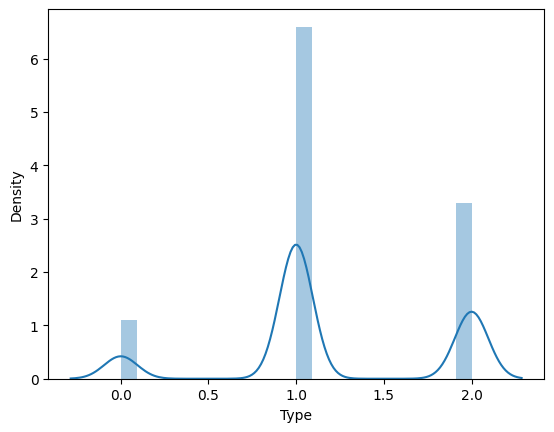

C:\Users\trigo\AppData\Local\Temp\ipykernel_21236\2685472240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


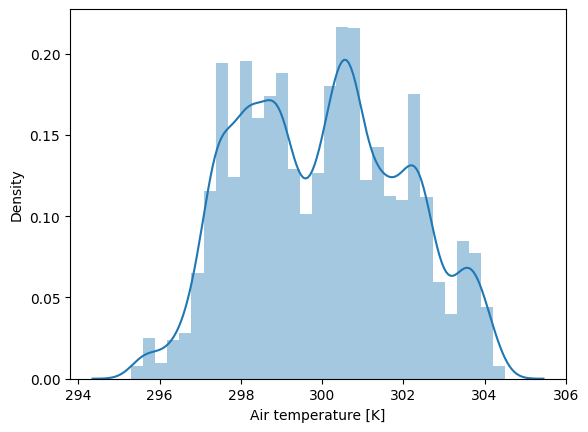

C:\Users\trigo\AppData\Local\Temp\ipykernel_21236\2685472240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


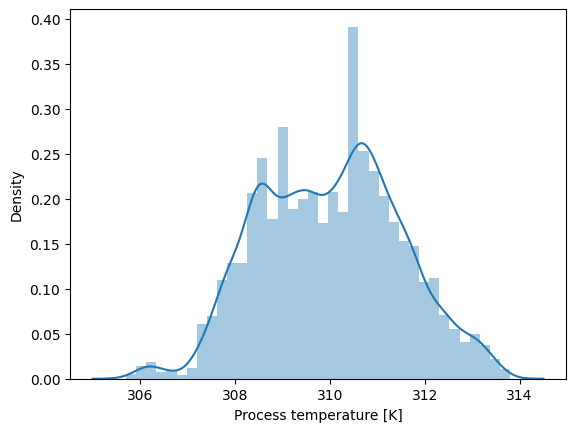

C:\Users\trigo\AppData\Local\Temp\ipykernel_21236\2685472240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


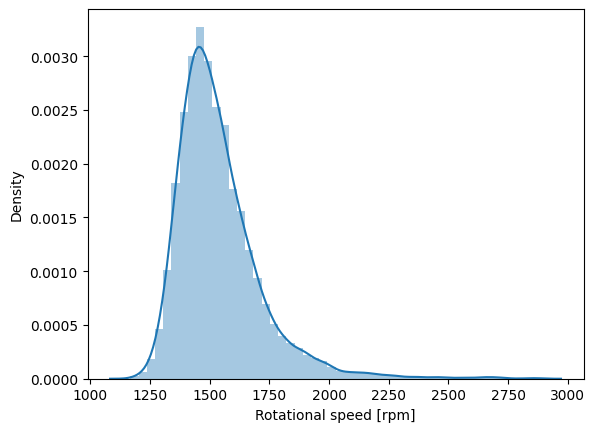

C:\Users\trigo\AppData\Local\Temp\ipykernel_21236\2685472240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


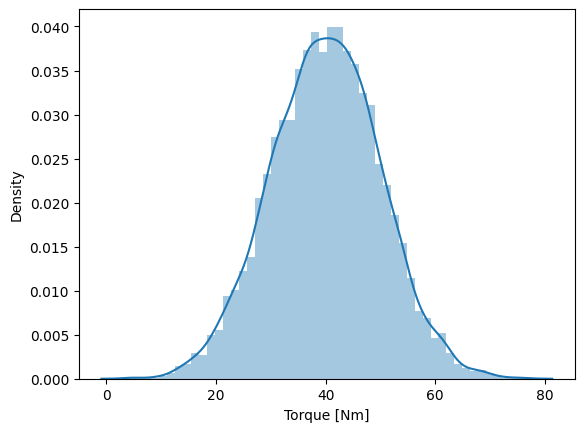

C:\Users\trigo\AppData\Local\Temp\ipykernel_21236\2685472240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


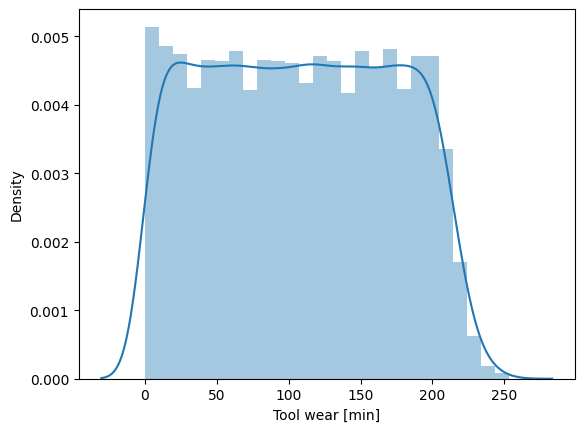

C:\Users\trigo\AppData\Local\Temp\ipykernel_21236\2685472240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


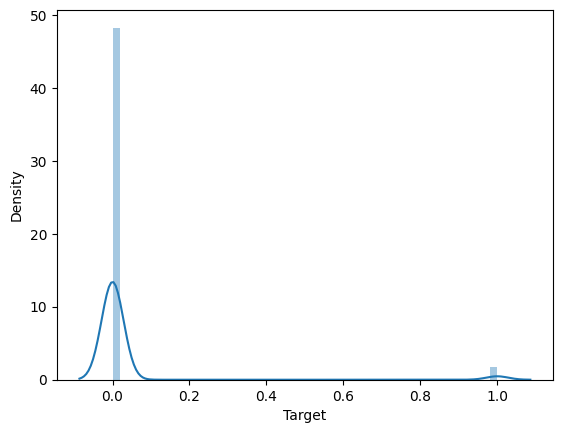

C:\Users\trigo\AppData\Local\Temp\ipykernel_21236\2685472240.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


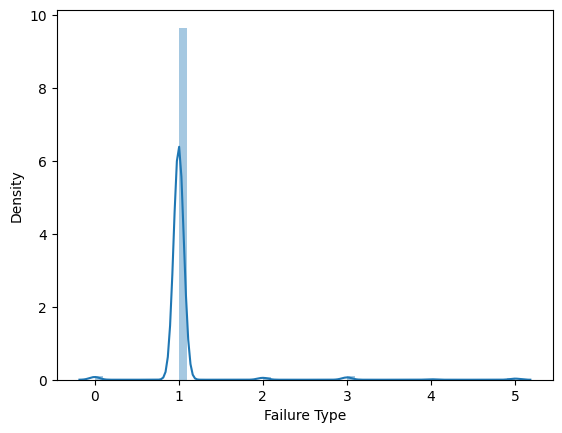

In [40]:
columns=[ 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type']
#HISTOGRAM PLOT
for col in columns:
    sns.distplot(df[col],kde=True)
    plt.show()

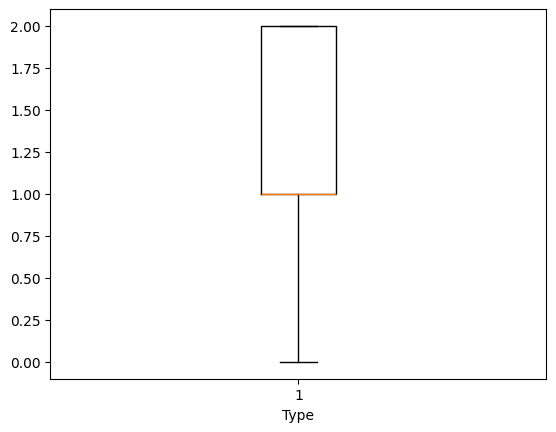

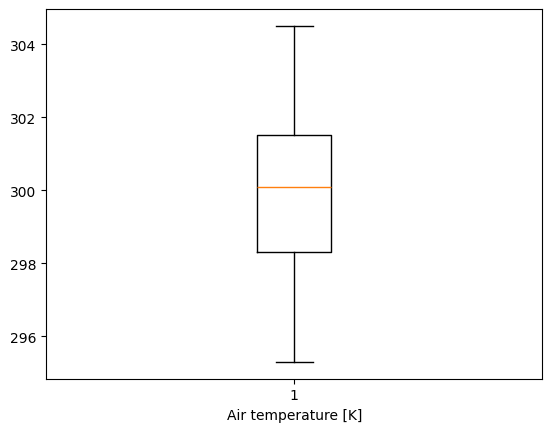

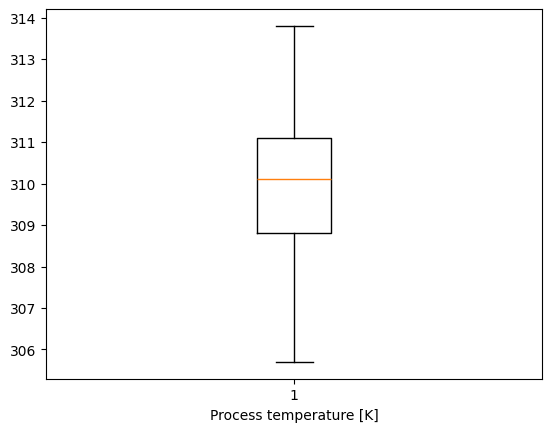

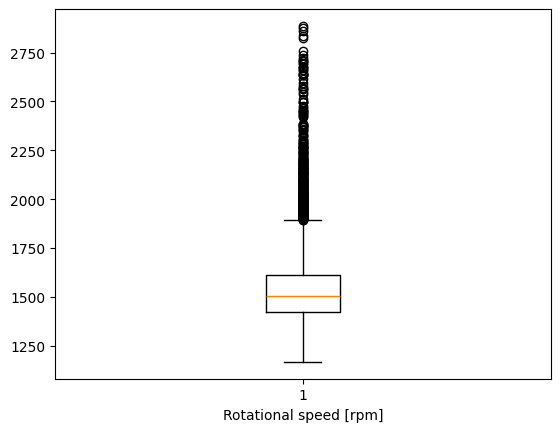

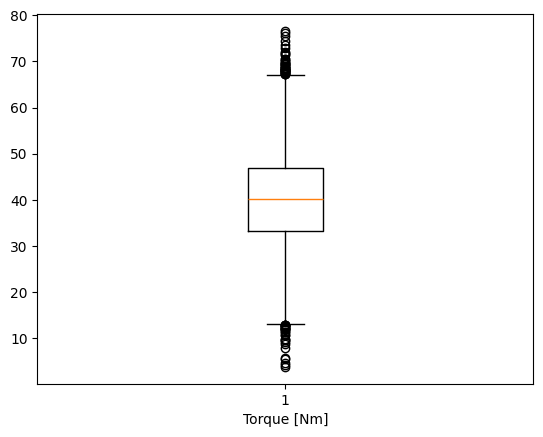

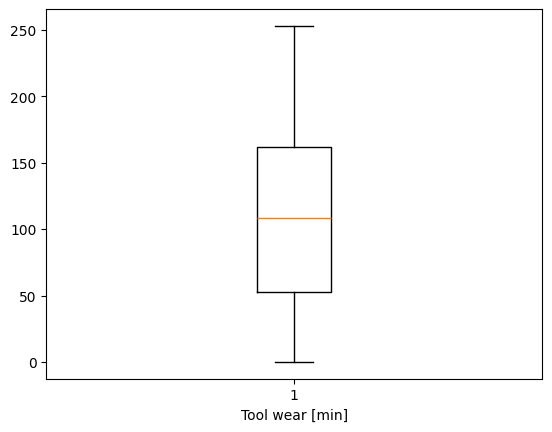

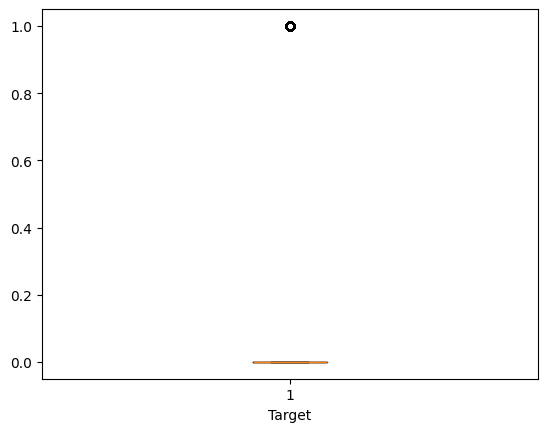

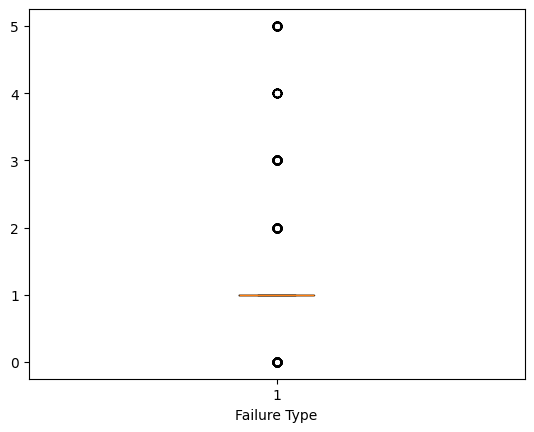

In [41]:
#BOXPLOT
columns=[ 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type']
for col in columns:
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [42]:
#CAPPING OUTLIERS
low_TY=df["Type"].mean()-(3*df["Type"].std())
high_TY=df["Type"].mean()+(3*df["Type"].std())

In [43]:
df[(df["Type"]<low_TY) | (df["Type"]>high_TY)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [44]:
#HENCE "TYPE" COLUMN HAS NO OUTLIERS. 

In [45]:
low_AT=df["Air temperature [K]"].mean()-(3*df["Air temperature [K]"].std())
high_AT=df["Air temperature [K]"].mean()+(3*df["Air temperature [K]"].std())

In [46]:
df[(df["Air temperature [K]"]<low_AT) | (df["Air temperature [K]"]>high_AT)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [47]:
#HENCE "Air temperature [K]" COLUMN HAS NO OUTLIERS.

In [48]:
low_PT=df["Process temperature [K]"].mean()-(3*df["Process temperature [K]"].std())
high_PT=df["Process temperature [K]"].mean()+(3*df["Process temperature [K]"].std())

In [49]:
df[(df["Process temperature [K]"]<low_PT) | (df["Process temperature [K]"]>high_PT)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [50]:
#HENCE "Process temperature [k]" column has no outliers.

In [51]:
Q1_RS=df["Rotational speed [rpm]"].quantile(0.25)
Q3_RS=df["Rotational speed [rpm]"].quantile(0.75)
IQR_RS=Q3_RS-Q1_RS

In [52]:
LOW_RS=Q1_RS-(3*IQR_RS)
HIGH_RS=Q3_RS+(3*IQR_RS)

In [53]:
df[(df["Rotational speed [rpm]"]<LOW_RS) | (df["Rotational speed [rpm]"]>HIGH_RS)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,1,298.9,309.1,2861,4.6,143,1,3
194,195,M15054,2,298.2,308.5,2678,10.7,86,1,3
344,345,M15204,2,297.5,308.2,2448,13.8,29,0,1
380,381,L47560,1,297.5,308.3,2564,12.8,127,1,3
463,464,L47643,1,297.4,308.7,2874,4.2,118,1,3
...,...,...,...,...,...,...,...,...,...,...
9732,9733,L56912,1,298.9,310.0,2231,17.4,151,0,1
9758,9759,L56938,1,298.6,309.8,2271,16.2,218,1,5
9849,9850,L57029,1,298.6,309.4,2312,15.5,44,0,1
9865,9866,M24725,2,298.9,309.8,2450,13.9,89,0,1


In [54]:
df["Rotational speed [rpm]"]=np.where(df["Rotational speed [rpm]"]<LOW_RS,LOW_RS,np.where(df["Rotational speed [rpm]"]>HIGH_RS,HIGH_RS,df["Rotational speed [rpm]"]))

In [55]:
#TRIMMING 
#df[(df[col name]>LOW_R)S & (df[col name]<HIGH_RS)]

In [56]:
df[(df["Rotational speed [rpm]"]<LOW_RS) | (df["Rotational speed [rpm]"]>HIGH_RS)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


<Axes: ylabel='Rotational speed [rpm]'>

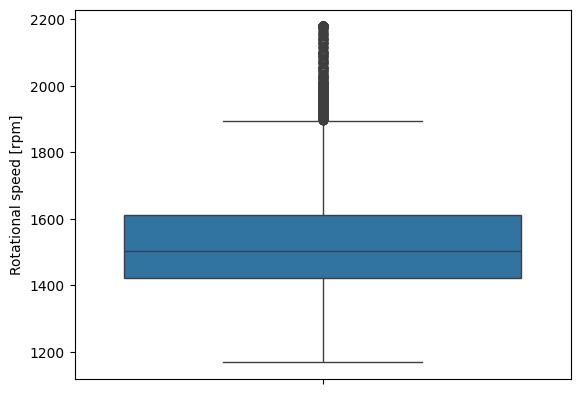

In [57]:
sns.boxplot(df["Rotational speed [rpm]"])

C:\Users\trigo\AppData\Local\Temp\ipykernel_21236\1003969540.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rotational speed [rpm]"],kde=True)


<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

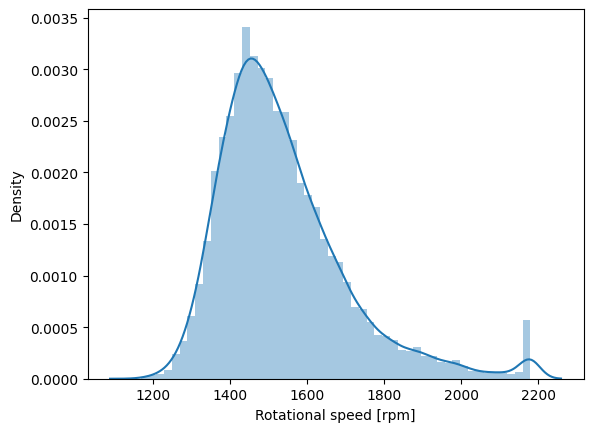

In [58]:
sns.distplot(df["Rotational speed [rpm]"],kde=True)

C:\Users\trigo\AppData\Local\Temp\ipykernel_21236\1556539644.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Torque [Nm]"],kde=True)


<Axes: xlabel='Torque [Nm]', ylabel='Density'>

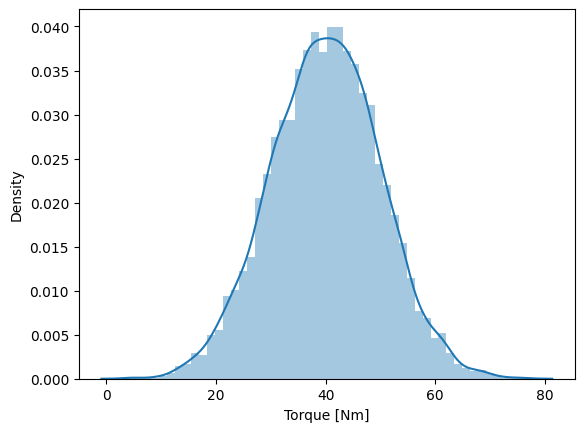

In [59]:
sns.distplot(df["Torque [Nm]"],kde=True)

<Axes: ylabel='Torque [Nm]'>

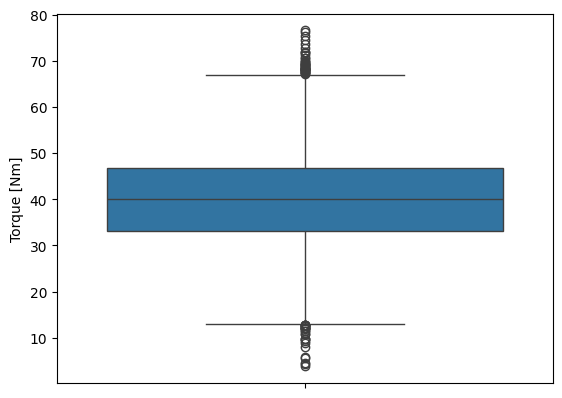

In [60]:
sns.boxplot(df["Torque [Nm]"])

In [61]:
LOW_TOR=df["Torque [Nm]"].mean()-(3*df["Torque [Nm]"].std())
HIGH_TOR=df["Torque [Nm]"].mean()+(3*df["Torque [Nm]"].std())

In [62]:
df["Torque [Nm]"]=np.where(df["Torque [Nm]"]<LOW_TOR,LOW_TOR,np.where(df["Torque [Nm]"]>HIGH_TOR,HIGH_TOR,df["Torque [Nm]"]))

In [63]:
df[(df["Torque [Nm]"]<LOW_TOR) | (df["Torque [Nm]"]>HIGH_TOR)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


C:\Users\trigo\AppData\Local\Temp\ipykernel_21236\1556539644.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Torque [Nm]"],kde=True)


<Axes: xlabel='Torque [Nm]', ylabel='Density'>

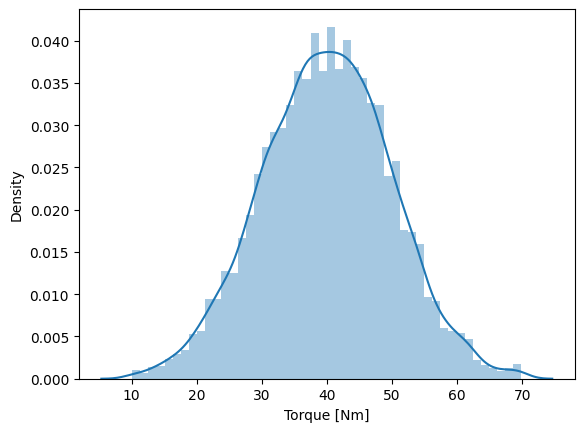

In [64]:
sns.distplot(df["Torque [Nm]"],kde=True)

<Axes: ylabel='Torque [Nm]'>

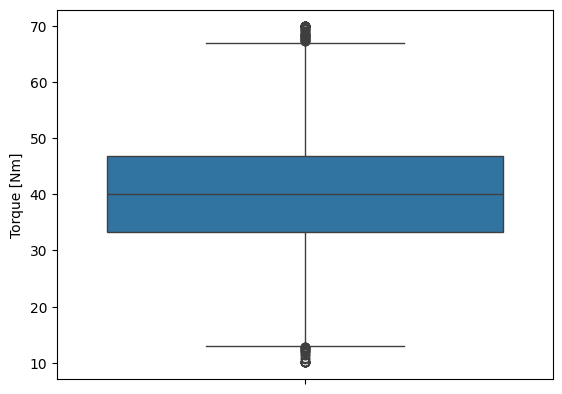

In [65]:
sns.boxplot(df["Torque [Nm]"])

In [66]:
#HENCE THE EDA PART IS DONE.
#STEP-4:COLLINEARITY:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,298.1,308.6,1551.0,42.8,0,0,1
1,2,L47181,1,298.2,308.7,1408.0,46.3,3,0,1
2,3,L47182,1,298.1,308.5,1498.0,49.4,5,0,1
3,4,L47183,1,298.2,308.6,1433.0,39.5,7,0,1
4,5,L47184,1,298.2,308.7,1408.0,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,298.8,308.4,1604.0,29.5,14,0,1
9996,9997,H39410,0,298.9,308.4,1632.0,31.8,17,0,1
9997,9998,M24857,2,299.0,308.6,1645.0,33.4,22,0,1
9998,9999,H39412,0,299.0,308.7,1408.0,48.5,25,0,1


In [67]:
df1=df.drop(["Product ID"],axis=1)
df1

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,2,298.1,308.6,1551.0,42.8,0,0,1
1,2,1,298.2,308.7,1408.0,46.3,3,0,1
2,3,1,298.1,308.5,1498.0,49.4,5,0,1
3,4,1,298.2,308.6,1433.0,39.5,7,0,1
4,5,1,298.2,308.7,1408.0,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...
9995,9996,2,298.8,308.4,1604.0,29.5,14,0,1
9996,9997,0,298.9,308.4,1632.0,31.8,17,0,1
9997,9998,2,299.0,308.6,1645.0,33.4,22,0,1
9998,9999,0,299.0,308.7,1408.0,48.5,25,0,1


In [68]:
corre=df1.corr()
corre

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,1.000000,0.005529,0.117428,0.324428,-0.003287,0.002831,-0.010702,-0.022892,-0.002152
Type,0.005529,1.000000,0.017599,0.013444,-0.002688,0.003858,-0.003930,-0.005152,-0.008249
Air temperature [K],0.117428,0.017599,1.000000,0.876107,0.022748,-0.013808,0.013853,0.082556,-0.025327
Process temperature [K],0.324428,0.013444,0.876107,1.000000,0.020285,-0.014193,0.013488,0.035946,-0.004600
Rotational speed [rpm],-0.003287,-0.002688,0.022748,0.020285,1.000000,-0.896383,0.002378,-0.092028,0.041130
Torque [Nm],0.002831,0.003858,-0.013808,-0.014193,-0.896383,1.000000,-0.003001,0.191397,0.031461
Tool wear [min],-0.010702,-0.003930,0.013853,0.013488,0.002378,-0.003001,1.000000,0.105448,0.111619
Target,-0.022892,-0.005152,0.082556,0.035946,-0.092028,0.191397,0.105448,1.000000,0.470541
Failure Type,-0.002152,-0.008249,-0.025327,-0.004600,0.041130,0.031461,0.111619,0.470541,1.000000


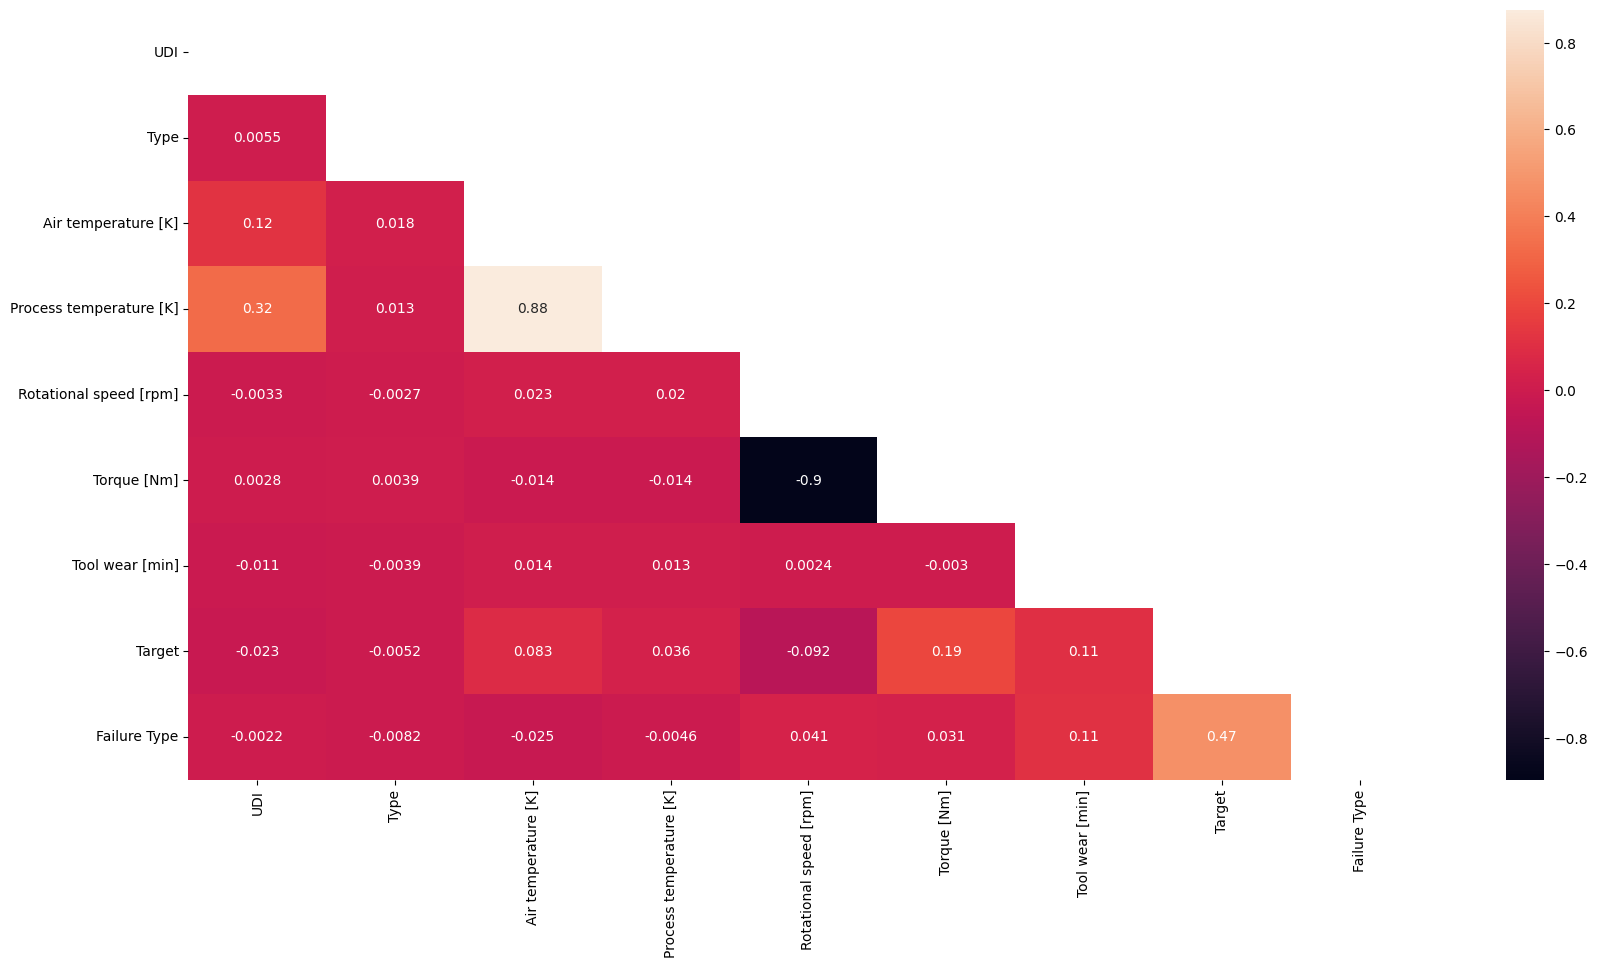

In [69]:
plt.figure(figsize=(20,10))
mask=np.triu(corre)
sns.heatmap(corre,mask=mask,annot=True)
plt.show()

In [70]:
#SO FROM THE ABOVE WE CAN SEE PROCESS TEMPERATURE AND AIR TEMPERATURE COLUMN ARE CORRELATED TO EACH OTHER AND REST
#OTHERS ARE NOT AT ALL. SO LETS SEE USING FEATURE SELECTION WHETHER WE WILL DROP THIS COLUMNS OR NOT .


In [71]:
#STEP-5:VISUALISATION:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

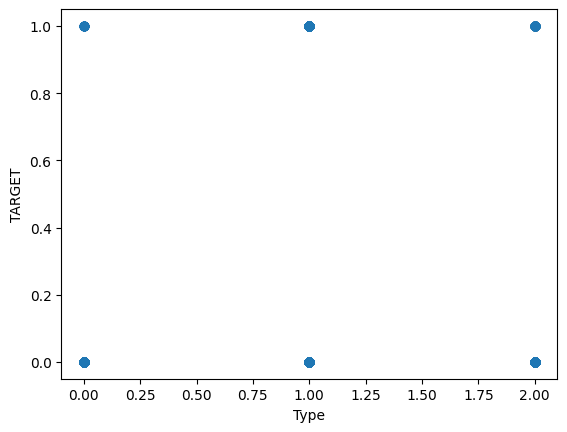

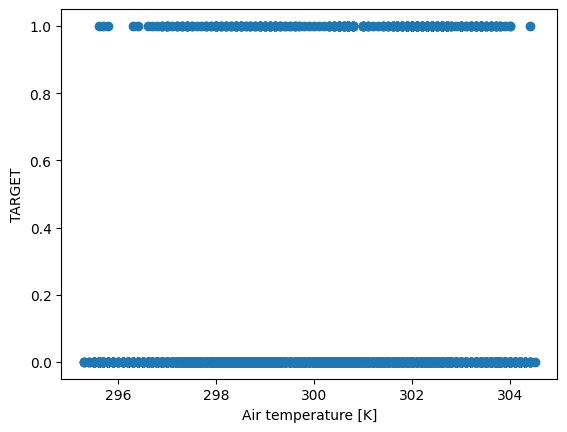

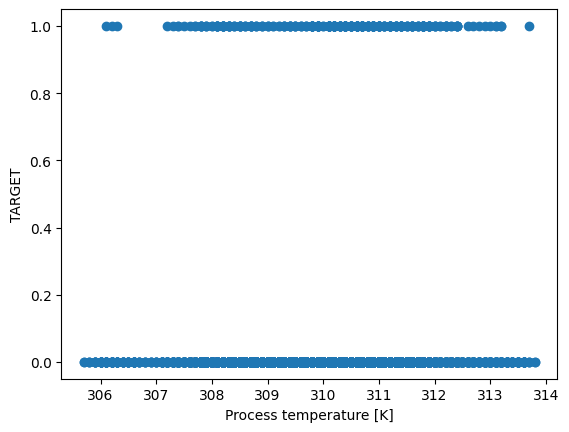

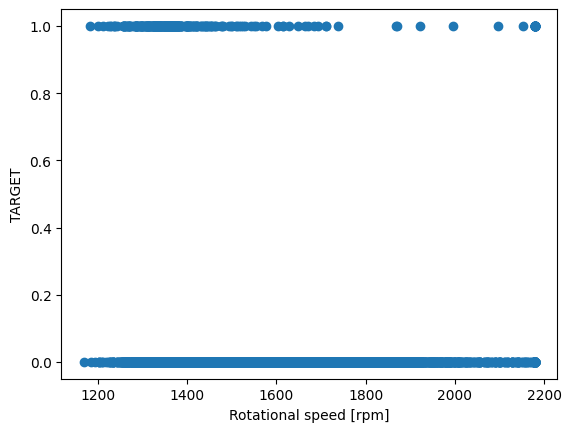

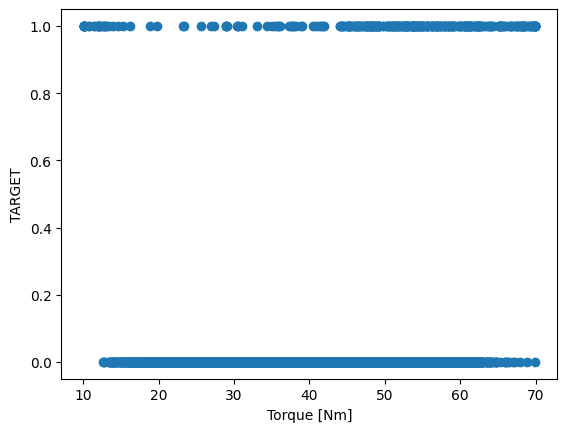

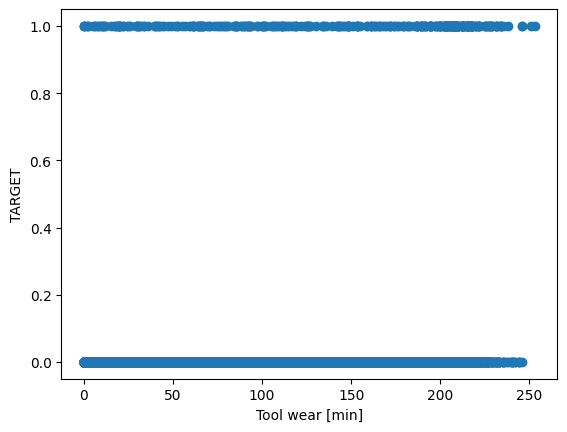

In [72]:
column=['Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]']
for col in column:
    plt.scatter(x=df[col],y=df["Target"])
    plt.xlabel(col)
    plt.ylabel("TARGET")
    plt.show()

<Axes: xlabel='Target', ylabel='count'>

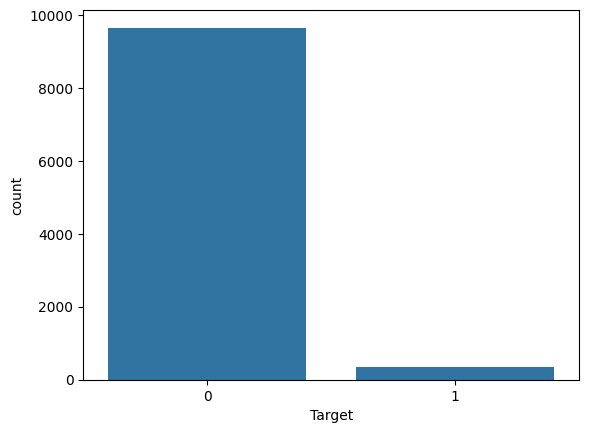

In [73]:
#BARGRAPH FOR CATEGORICAL COLUMNS
sns.countplot(data=df,x="Target") #TO GET THE COUNT OF EACH TYPE IN THE COLUMN

In [ ]:
#SO FROM THE ABOVE VISUALISATION WE SEE THAT OUR TARGET CLASS IS IMBALANCED, SO WE HAVE TO BALANCE IT.

<Axes: xlabel='Target', ylabel='count'>

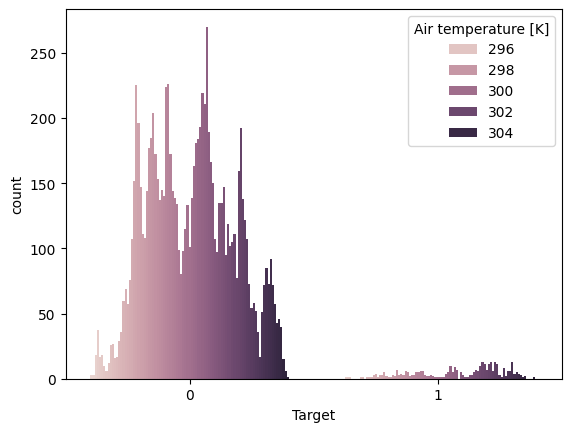

In [74]:
sns.countplot(data=df,x="Target",hue="Air temperature [K]") #TO COMPARE WHAT IS THE RANGE OF AIR TEMPERATURE WRT FAILURE AND NO FAILURE.

<Axes: xlabel='Type', ylabel='count'>

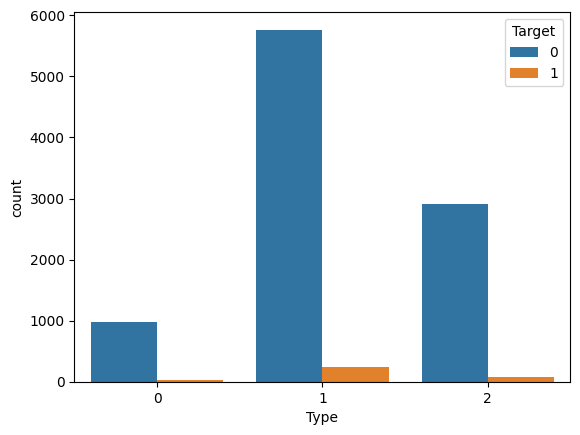

In [75]:
sns.countplot(data=df,x="Type",hue="Target")

<Axes: ylabel='count'>

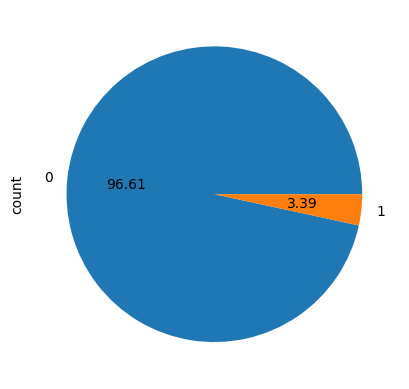

In [10]:
#PIE CHART #TO GET THE PERCENTAGES OF EACH TYPE

df["Target"].value_counts().plot(kind="pie",autopct="%.2f")


<Axes: xlabel='Process temperature [K]', ylabel='Count'>

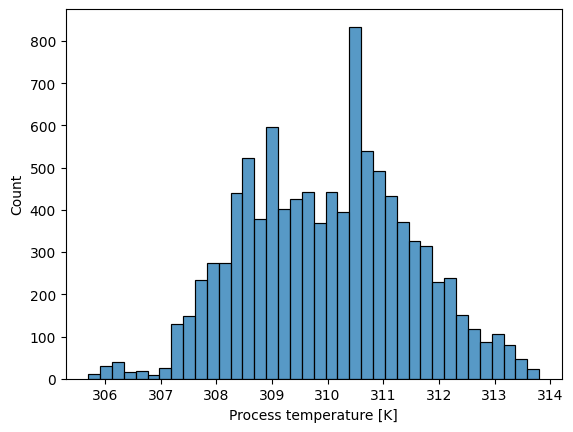

In [13]:
#FOR NUMERICAL COLUMNS
sns.histplot(df["Process temperature [K]"])

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

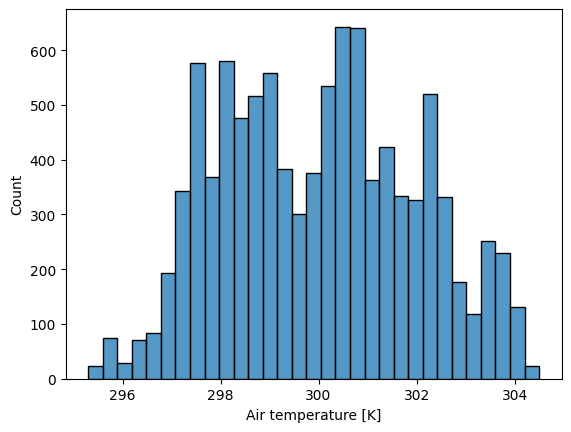

In [14]:
sns.histplot(df["Air temperature [K]"])

In [121]:
#BUILDING THE MODEL:
x=df.drop(["Target","Failure Type","UDI","Product ID"],axis=1)
y=df["Target"]


In [140]:
#BALANCING THE IMBALANCED CLASS
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target column
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
xtrain_res, ytrain_res = smote.fit_resample(xtrain, ytrain)

In [141]:
x.shape

(10000, 6)

In [142]:
y.shape

(10000,)

In [143]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [144]:
xtrain.shape

(7000, 6)

In [145]:
xtest.shape

(3000, 6)

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
model1=LogisticRegression()
model1.fit(xtrain,ytrain)

LogisticRegression()

In [148]:
model1.score(xtrain,ytrain)

0.9675714285714285

In [149]:
ypred=model1.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [150]:
model1.score(xtest,ytest)

0.973

In [151]:
cm=confusion_matrix(ypred,ytest)
cm

array([[2906,   78],
       [   3,   13]], dtype=int64)

In [152]:
CR=classification_report(ypred,ytest,output_dict=True)
CR=pd.DataFrame(CR).transpose()
CR

,precision,recall,f1-score,support
0,0.998969,0.973861,0.986255,2984.000
1,0.142857,0.812500,0.242991,16.000
accuracy,0.973000,0.973000,0.973000,0.973
macro avg,0.570913,0.893180,0.614623,3000.000
weighted avg,0.994403,0.973000,0.982291,3000.000


In [153]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [154]:
model2.score(xtrain,ytrain)

1.0

In [155]:
ypred=model2.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [156]:
model2.score(xtest,ytest)

0.9816666666666667

In [157]:
cm=confusion_matrix(ypred,ytest)
cm

array([[2879,   25],
       [  30,   66]], dtype=int64)

In [158]:
CR=classification_report(ypred,ytest,output_dict=True)
CR=pd.DataFrame(CR).transpose()
CR

,precision,recall,f1-score,support
0,0.989687,0.991391,0.990538,2904.000000
1,0.725275,0.687500,0.705882,96.000000
accuracy,0.981667,0.981667,0.981667,0.981667
macro avg,0.857481,0.839446,0.848210,3000.000000
weighted avg,0.981226,0.981667,0.981429,3000.000000
